# Welcome to the MLB Playoff Win Predictor
Let\'s see what is the most impactful single factor to a team in winning games in the postseason of Baseball

## Abstract
I will viewing at a number of telling statistics and trying to find one that has a strong correlation to playoff wins. While fully explaining the importance of these single statistics for the team and how they might contribute to a team's success in the playoffs.

# Research Question
Which Baseball Statistics (RBI, Walks, OPS, ERA, etc.) positively and negatively correlate with Winning Games in the Playoffs for the years 2020-2024? Which statistic correlates the best and worst over that whole time period? Can a prediction algortihm predict how many wins a team will get by looking at a single baseball statistic?

# Hypothesis
I think that in the modern era of Baseball, Offense is on such a rise with new offensive records being broken every year. Being able to quelch a team's offense through pitching would be my assumption of how to win games in the playoffs. It is also well understood that a bullpen (Relief Pitchers) play a very important factor on the success of a team. Therefore, my hypothesis is that a Team's Relief Pitcher's ERA will have the largest positive correlation to winning in the playoffs.

# Background and Prior Knowledge

Baseball has a regular season of 162 games in which the best 12 teams get the oppurtnity to play in the postseason. In recent years, with playoff expansion, more and more head scratching upsets are occurring in the playoffs. For example in the most recent postseason, we saw the 6th ranked team, New York Mets, beat the 2nd ranked team, Philideplphia Phillies. Not only was this the second upset that the Mets made in the postseason, also beating the 3rd ranked Milwalkee Brewers, but there were 2 other upsets on the other side of the bracket. If you go back further to 2019 the Nationals weren't even supposed to make it to the playoffs after three months into the season, they ended up winning the World Series being ranked as the 7th seed. These rankings have always been done by the amount of wins a team has, clearly they aren't the best statistic to rank these teams.

In 1994, there was the broadening of the postseason format with the addition of the Wild Card. Up until 2011 there was only 1 Wild Card Team per league, and then in 2012 they added a Wild Card Series making the format the best 12 teams (6 teams per league, 3 best of divisions and 3 wild cards). The greatest upset with this new format was in 2023, when both teams Texas Rangers and Arizona Diamondbacks, wild cards, made it to the World Series. This postseason had a total of 7 teams win while their opponent was that were ranked higher than them. These "Underdog" stories are always fun to watch as a fan every once in a while, but more recently they appear to be happening more and more often. In the last 5 years there has been a total of 12 Series Wins by Wild Card Teams, not including the Wild Card Series. Due to the uncertainty of these games, more and more people have been tuned in every October to watch the playoffs. Therefore this format probably will not change, and might expand to more teams allowing more of the "Underdog" runs to occur.

The problem comes with trying to predict how games will turn out. Baseball is such a fun sport for Data Scientists as there are over a 100 statistics that tell you how a certain player, or team might perform. These statistics ranging from how often a player/team gets a hit, to how many wins does a individual player contribute above a replacement player. Thankfully the access to all these statistics are publically available and free to use for Data Scientists alike, making many people to create prediction algorithms to try to guess who might win a given game.

In an article titled "Baseball so hard to predict" by Ryan Steig written back in 2019 where it is stated "Preseason playoff predictions rarely turn out to be entirely correct and Major League Baseball is proving that right now" (Steig, 2019). The year 2019 being one of the greatest examples of a "juiced ball" that we have seen in recent year, proves that it is harder to predict the outcome of these games in the playoffs. Even more interesting, the winner of the 2019 World Series was also a Wild Card team, the Washington Nationals. Steig mentions how great these teams were that were entering the postseason that year and the concludes the article by stating "Preseason predictions rarely pan out exactly as expected and the playoffs are the same way" (Steig, 2019). Many people see baseball as very a difficult game to sports bet on due to its volitility. In the article title "5 Reasons Why Betting on Baseball Is So Hard" by John Simons, he views at all the factors that make baseball a hard sport to bet on. The reasons given by Simons are Statistical Complexity, Underdog Wins, Frequent Games, [Betting] Line Movement, and other variables (Simons, 2024). Including these reasons he also highlights how a team "like the LA Dodgers have amazing seasons with records like 111-51, they still lose 30% of the time" (Simons, 2024). Baseball being such a unpredictable sport is why so many people watch it every year.

Even with all the statistics in baseball in mind it is near impossible to predict winners of certain games let alone multiple playoff series due to all the important factors that affect every baseball game. Although this is a difficult task I want to be able to anaylze each statistic individually, checking its correlation with winning in the playoffs. There doesn't seem to be any studies done that cover this specific topic, using this method.

Impelli, M. (2019, October 31). The Washington Nationals defied all odds to win the 2019 World Series. Newsweek. https://www.newsweek.com/washington-nationals-had-ridiculously-small-chance-winning-world-series-1468949 
Simons, J. (2024, July 8). 5 reasons why betting on baseball is so hard. Bet M. https://betm.co/why-betting-on-baseball-is-so-hard/ 
Steig, R. (2019, September 27). Baseball so hard to predict. miningjournal.net. https://www.miningjournal.net/sports/sports-columns/2019/09/baseball-so-hard-to-predict/ 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
batting24 = pd.read_csv("Data/BaseballStats2024/Batting24.csv")
fielding24 = pd.read_csv("Data/BaseballStats2024/Fielding24.csv")
relief24 = pd.read_csv("Data/BaseballStats2024/Relief24.csv")
salaries24 = pd.read_csv("Data/BaseballStats2024/Salaries24.csv")
starting24 = pd.read_csv("Data/BaseballStats2024/Starting24.csv")
batting24 = batting24.rename(columns = {'Tm':'Team'})
fielding24 = fielding24.rename(columns = {'Tm':'Team'})
relief24 = relief24.rename(columns = {'TEAM':'Team'})
starting24 = starting24.rename(columns = {'TEAM':'Team'})
salaries24 = salaries24.rename(columns = {'TEAM':'Team'})

team_name_mapping = {
    # American League (AL)
    "Yankees": "New York Yankees",
    "Red Sox": "Boston Red Sox",
    "Blue Jays": "Toronto Blue Jays",
    "Rays": "Tampa Bay Rays",
    "Orioles": "Baltimore Orioles",
    "White Sox": "Chicago White Sox",
    "Guardians": "Cleveland Guardians",
    "Tigers": "Detroit Tigers",
    "Royals": "Kansas City Royals",
    "Twins": "Minnesota Twins",
    "Astros": "Houston Astros",
    "Angels": "Los Angeles Angels",
    "Athletics": "Oakland Athletics",
    "Mariners": "Seattle Mariners",
    "Rangers": "Texas Rangers",
    # National League (NL)
    "Braves": "Atlanta Braves",
    "Marlins": "Miami Marlins",
    "Mets": "New York Mets",
    "Phillies": "Philadelphia Phillies",
    "Nationals": "Washington Nationals",
    "Cubs": "Chicago Cubs",
    "Reds": "Cincinnati Reds",
    "Brewers": "Milwaukee Brewers",
    "Pirates": "Pittsburgh Pirates",
    "Cardinals": "St. Louis Cardinals",
    "Diamondbacks": "Arizona Diamondbacks",
    "Rockies": "Colorado Rockies",
    "Dodgers": "Los Angeles Dodgers",
    "Padres": "San Diego Padres",
    "Giants": "San Francisco Giants"
}

fielding24 = fielding24[['Team', 'Rtot', 'Rdrs' ]]
batting24 = batting24[['Team', 'BatAge', 'R/G', 'HR', 'OPS', 'R','H','2B','3B','RBI','SB','CS','BB','SO','BA','OBP','SLG', 'OPS+','TB','GDP','HBP','SH','SF','IBB','LOB']]
starting24 = starting24[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Starting WHIP", "ERA" : "Starting ERA"})
relief24 = relief24[['Team', "WHIP", "ERA"]].rename(columns = {'WHIP' : "Relief WHIP", "ERA" : "Relief ERA"})
salaries24 = salaries24[['Team', 'TOTAL PAYROLL']].set_index('Team').rename(columns = {'TOTAL PAYROLL' : 'Team Salary'}, index = team_name_mapping ).reset_index()

def standarize_teams(team):
    return team[team.index('\n')+1:]
def standarize_money(money):
    return int(money[1:].replace(',', ""))
relief24['Team'] = relief24['Team'].apply(standarize_teams)
starting24['Team'] = starting24['Team'].apply(standarize_teams)
salaries24["Team Salary"] = salaries24["Team Salary"].apply(standarize_money)



def mergetopia(dfs):
    totalmerge = dfs[0]
    for i in range(1, len(dfs)):
        totalmerge = pd.merge(totalmerge, dfs[i])
    return totalmerge
Team_Data24 = mergetopia([fielding24, batting24, starting24, relief24, salaries24])
Team_Data24.set_index('Team')



,Rtot,Rdrs,BatAge,R/G,HR,OPS,R,H,2B,3B,...,HBP,SH,SF,IBB,LOB,Starting WHIP,Starting ERA,Relief WHIP,Relief ERA,Team Salary
Team,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,-11,13,28.6,5.47,211,0.777,886,1452,271,37,...,84,34,66,17,1111,1.34,4.79,1.37,4.41,156511716
Atlanta Braves,10,35,29.3,4.35,213,0.724,704,1333,273,15,...,58,9,39,11,1088,1.20,3.58,1.18,3.32,225315000
Baltimore Orioles,-21,1,26.9,4.85,235,0.751,786,1391,262,33,...,64,6,45,14,1108,1.24,3.77,1.23,4.22,94495168
Boston Red Sox,28,49,27.3,4.64,194,0.741,751,1404,311,30,...,73,7,40,30,1116,1.19,3.81,1.34,4.39,162324847
Chicago Cubs,12,37,27.8,4.54,170,0.710,736,1318,253,29,...,70,17,41,19,1105,1.22,3.77,1.29,3.81,216330000
Chicago White Sox,-81,-87,27.8,3.13,133,0.618,507,1187,226,9,...,43,18,27,8,1014,1.36,4.62,1.53,4.73,117773333
Cincinnati Reds,8,-30,27.1,4.31,174,0.693,699,1230,257,29,...,87,18,43,7,989,1.23,4.09,1.28,4.09,88123333
Cleveland Guardians,37,89,26.1,4.40,185,0.703,708,1263,245,18,...,87,17,43,30,978,1.32,4.40,1.05,2.57,86433928
Colorado Rockies,-7,20,27.9,4.21,179,0.704,682,1319,277,25,...,51,19,45,20,1028,1.50,5.54,1.55,5.41,134099285


Now we have completeley merged the 5 csv files that I gathers earlier into one Clean Dataset with all the teams in 2024 and their team statistics that I see as valuable variables that could contribute to a team winning more playoff wins. Now we have to merge a columns of playoffs wins that each of these teams had and see how these statistics measure up.

In [37]:
baseball_terms = {
    'Rtot': 'Total Zone',
    'Rdrs': 'Defensive Runs Saved',
    'BatAge': 'Average Age of Batters',
    'R/G': 'Runs per Game',
    'HR': 'Home Runs',
    'OPS': 'On-base Plus Slugging',
    'R': 'Runs',
    'H': 'Hits',
    '2B': 'Doubles',
    '3B': 'Triples',
    'RBI': 'Runs Batted In',
    'SB': 'Stolen Bases',
    'CS': 'Caught Stealing',
    'BB': 'Walks',
    'SO': 'Strikeouts',
    'BA': 'Batting Average',
    'OBP': 'On-base Percentage',
    'SLG': 'Slugging Percentage',
    'OPS+': 'Adjusted On-base Plus Slugging',
    'TB': 'Total Bases',
    'GDP': 'Ground into Double Plays',
    'HBP': 'Hit by Pitch',
    'SH': 'Bunts',
    'SF': 'Sacrifice Flies',
    'IBB': 'Intentional Base on Balls',
    'LOB': 'Left on Base'
}
playoff_wins24 = pd.DataFrame({
    'Team' : ["Detroit Tigers", "Houston Astros", "Kansas City Royals",
    "Baltimore Orioles", "Cleveland Guardians", "New York Yankees",
    "New York Mets", "Philadelphia Phillies", "Milwaukee Brewers", 
    "San Diego Padres", "Atlanta Braves", "Los Angeles Dodgers"], 
    "Playoff Wins" : [4, 0, 2, 0, 3, 8, 7, 1, 1, 4, 0, 11]
})
postseason_data24 = pd.merge(playoff_wins24, Team_Data24).rename(columns = baseball_terms)
cols = postseason_data24.columns
corrval24 = []
stats24 =  []
strength_corr24 = []
for i in range(2, len(cols)):
    correl = postseason_data24['Playoff Wins'].corr(postseason_data24[cols[i]])
    corrval24.append(correl)
    stats24.append(cols[i])
    if (correl >= 0.8):
        strength_corr24.append('Very Strong Positive')
    elif (correl >= 0.6):
        strength_corr24.append('Fairly Strong Positive')
    elif (correl >= 0.4):
        strength_corr24.append('Moderate Positive')
    elif (correl >= 0.2):
        strength_corr24.append('Weak Positive')
    elif (correl >= 0):
        strength_corr24.append('Very Weak Positive')
    elif (correl >= -0.2):
        strength_corr24.append('Very Weak Negative')
    elif (correl >= -0.4):
        strength_corr24.append('Weak Negative')
    elif (correl >= -0.6):
        strength_corr24.append('Moderate Negative')
    elif (correl >= -0.8):
        strength_corr24.append('Fairly Strong Negative')
    elif (correl >= -1):
        strength_corr24.append('Very Strong Negative')

Correlations24 = pd.DataFrame({"Statistic" : stats24, "Correlations": corrval24, "Strength":strength_corr24})
Correlations24 = Correlations24.sort_values(by = 'Correlations', ascending = False)
Correlations24

,Statistic,Correlations,Strength
13,Walks,0.581575,Moderate Positive
10,Runs Batted In,0.548038,Moderate Positive
6,Runs,0.533087,Moderate Positive
3,Runs per Game,0.528850,Moderate Positive
16,On-base Percentage,0.473192,Moderate Positive
30,Team Salary,0.418529,Moderate Positive
5,On-base Plus Slugging,0.412934,Moderate Positive
27,Starting ERA,0.412177,Moderate Positive
2,Average Age of Batters,0.411147,Moderate Positive
18,Adjusted On-base Plus Slugging,0.408713,Moderate Positive


## Graphs for the 3 Strongest and Weakest Correlation Statistics 2024

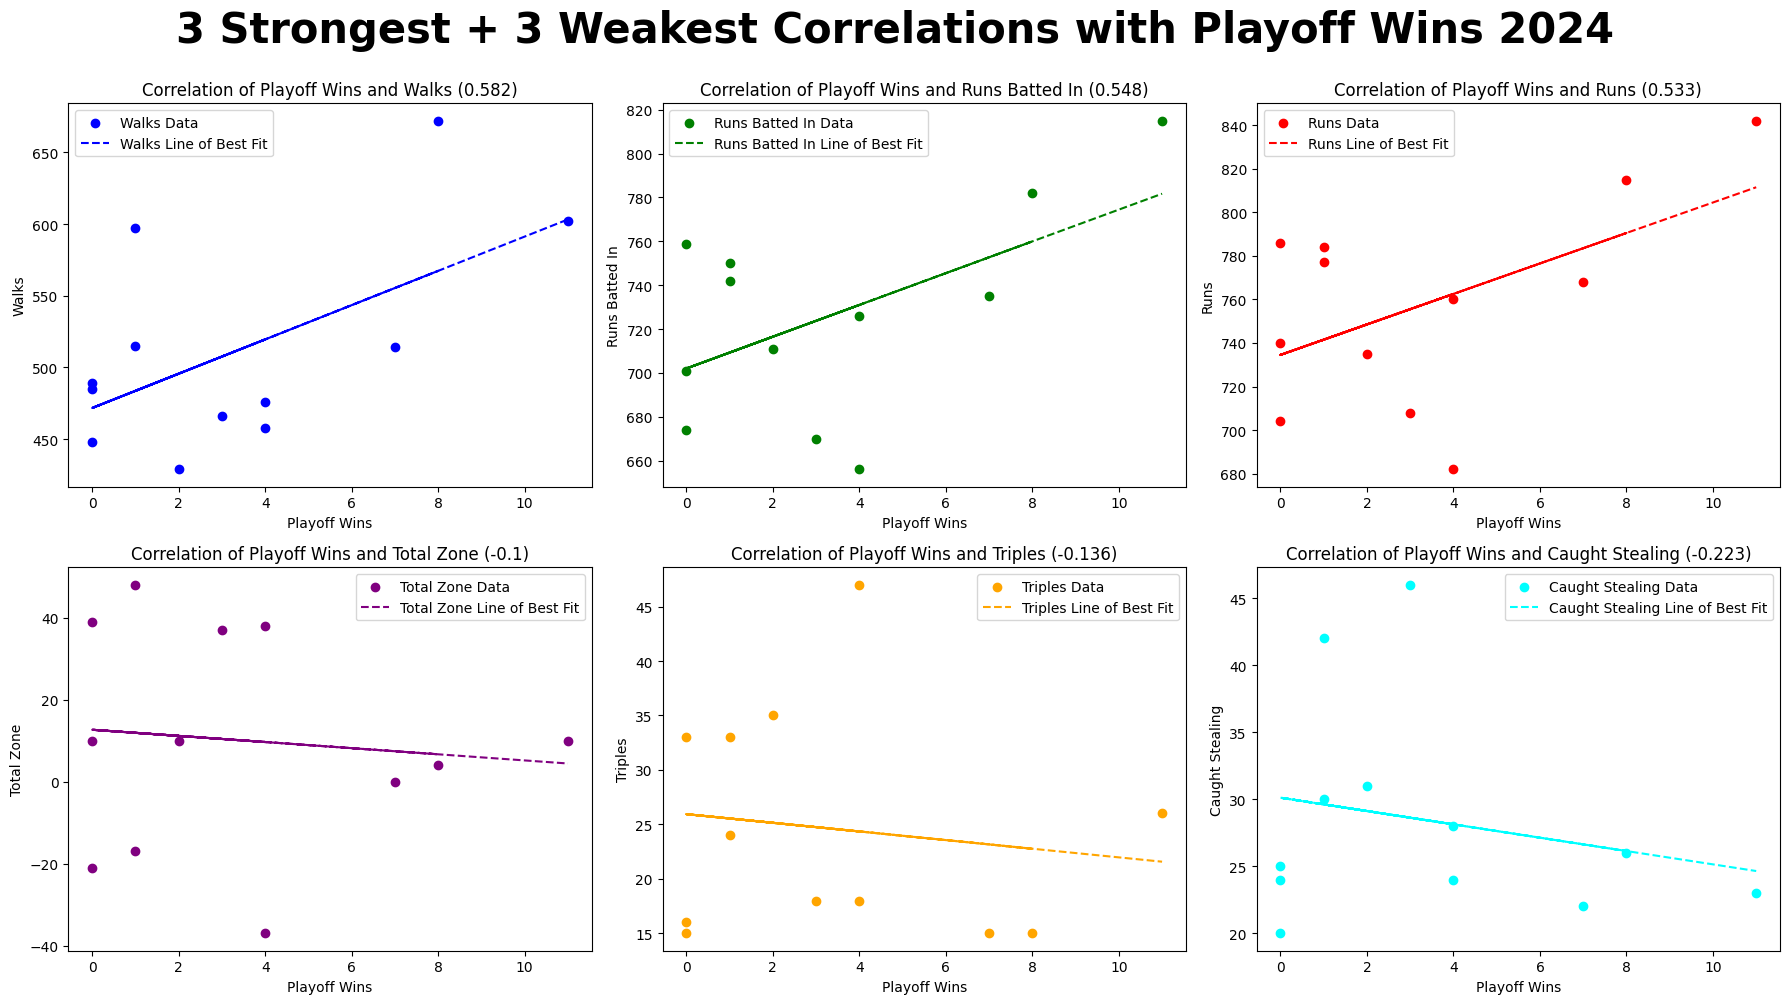

In [38]:
important24 = pd.concat([Correlations24.iloc[:3], Correlations24.iloc[-3:]]).set_index('Statistic')
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
fig.suptitle('3 Strongest + 3 Weakest Correlations with Playoff Wins 2024', fontsize=30, fontweight='bold', y=1)
for i, (index, row) in enumerate(important24.iterrows()):
    a, b = np.polyfit(postseason_data24['Playoff Wins'], postseason_data24[index], 1)
    axes[i].scatter(postseason_data24['Playoff Wins'], postseason_data24[index], color=colors[i], label=f'{index} Data')
    axes[i].plot(postseason_data24['Playoff Wins'], a * postseason_data24['Playoff Wins'] + b, color=colors[i], linestyle='--', label=f'{index} Line of Best Fit')
    axes[i].set_xlabel('Playoff Wins')
    axes[i].set_ylabel(index)
    axes[i].set_title(f"Correlation of Playoff Wins and {index} ({round(row['Correlations'], 3)})")
    axes[i].legend()
plt.tight_layout()
plt.show()